In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import random

In [2]:
data=pd.read_csv("train_data_iitm.csv")

In [3]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'congestion_surcharge'],
      dtype='object')

<AxesSubplot:>

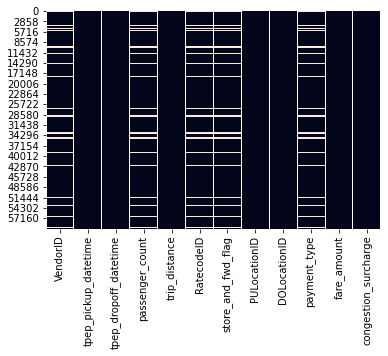

In [4]:
sns.heatmap(data.isnull(),cbar=False)

In [5]:
# for calculating the travel time
def convert(a):
    y=int(a[0:4])
    m=int(a[5:7])
    d=int(a[8:10])
    h=int(a[11:13])
    mi=int(a[14:16])
    s=int(a[17:19])
    return datetime(year=y,month=m,day=d,hour=h,minute=mi,second=s)
def duration(a,b):
    d1=convert(a)
    d2=convert(b)
    return (d2-d1).seconds

In [6]:
travel_duration=[duration(data.tpep_pickup_datetime[i],data.tpep_dropoff_datetime[i]) for i in data.index]
td=pd.DataFrame(travel_duration)
td.columns=['Travel_duration']
data=pd.concat([data,td],axis=1)

In [7]:
data.isnull().sum()

VendorID                 5635
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5635
trip_distance               0
RatecodeID               5635
store_and_fwd_flag       5635
PULocationID                0
DOLocationID                0
payment_type             5635
fare_amount                 0
congestion_surcharge        0
Travel_duration             0
dtype: int64

In [8]:
data.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag'
           ,'payment_type','RatecodeID','congestion_surcharge'],axis=1,inplace=True)

In [9]:
data.passenger_count.value_counts()

1.0    42508
2.0     6205
3.0     1538
0.0     1399
5.0     1240
6.0      981
4.0      494
Name: passenger_count, dtype: int64

In [10]:
data['passenger_count'].replace(np.nan,1,inplace=True)

Text(0, 0.5, 'Fare')

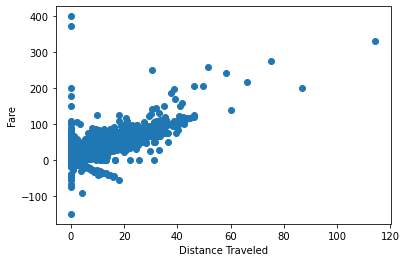

In [11]:
plt.scatter(data.trip_distance,data.fare_amount)
plt.xlabel("Distance Traveled")
plt.ylabel("Fare")

In [12]:
sum(data.fare_amount<0)


294

In [13]:
data=data[data.fare_amount>=0]

Text(0, 0.5, 'Fare')

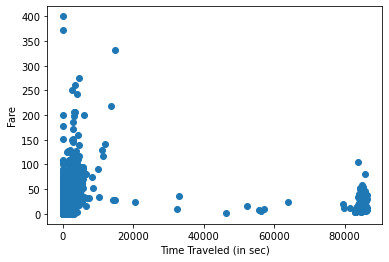

In [14]:
plt.scatter(data.Travel_duration,data.fare_amount)
plt.xlabel("Time Traveled (in sec)")
plt.ylabel("Fare")

In [15]:
sum(data.Travel_duration>20000)

91

In [16]:
data=data[data.Travel_duration<=20000]

Text(0, 0.5, 'Fare')

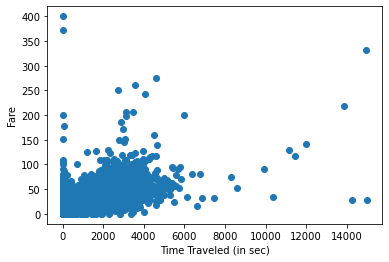

In [17]:
plt.scatter(data.Travel_duration,data.fare_amount)
plt.xlabel("Time Traveled (in sec)")
plt.ylabel("Fare")

In [18]:
mape=pd.read_csv("taxi_zone_mapping.csv")

In [19]:
same_zone=[0 if mape.service_zone[data.PULocationID[i]-1]==mape.service_zone[data.DOLocationID[i]-1] else 1 for i in data.index]

In [20]:
sz=pd.DataFrame(same_zone)
sz.columns=['sz']
sz.index=data.index
data=pd.concat([data,sz],axis=1)

In [21]:
data.drop(['PULocationID','DOLocationID'],axis=1,inplace=True)

In [22]:
datasz_0=data[data.sz==0]
datasz_1=data[data.sz==1]

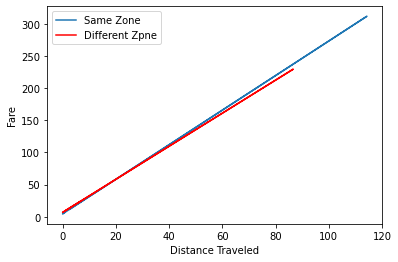

In [23]:
x=datasz_0.trip_distance
y=datasz_0.fare_amount
m1,b1=np.polyfit(x,y,1)
plt.plot(x,m1*x+b1)
x=datasz_1.trip_distance
y=datasz_1.fare_amount
m2,b2=np.polyfit(x,y,1)
plt.plot(x,m2*x+b2,color='red')
plt.xlabel("Distance Traveled")
plt.ylabel("Fare")
plt.legend(['Same Zone','Different Zpne'])

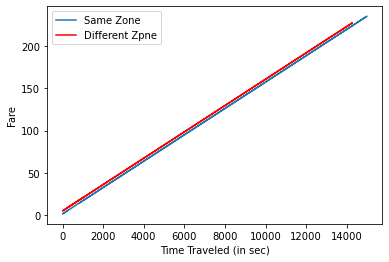

In [24]:
x1=datasz_0.Travel_duration
y1=datasz_0.fare_amount
m1,b1=np.polyfit(x1,y1,1)
plt.plot(x1,m1*x1+b1)
x2=datasz_1.Travel_duration
y2=datasz_1.fare_amount
m2,b2=np.polyfit(x2,y2,1)
plt.plot(x2,m2*x2+b2,color='red')
plt.xlabel("Time Traveled (in sec)")
plt.ylabel("Fare")
plt.legend(['Same Zone','Different Zpne'])

In [25]:
data.drop(['sz'],axis=1,inplace=True)

In [26]:
x=data.passenger_count*data.trip_distance
xd=pd.DataFrame(x)
xd.columns=['pass_dist']
data=pd.concat([data,xd],axis=1)

In [27]:
x=data.passenger_count*data.Travel_duration
xd=pd.DataFrame(x)
xd.columns=['pass_time']
data=pd.concat([data,xd],axis=1)

In [28]:
data.drop(['passenger_count'],axis=1,inplace=True)

Text(0, 0.5, 'Fare')

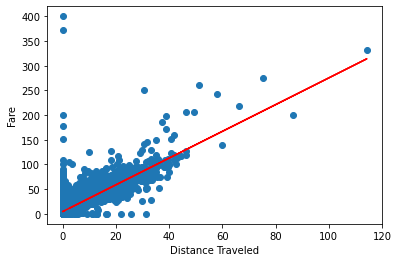

In [29]:
x=data.trip_distance
y=data.fare_amount
m,b=np.polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,m*x+b,'red')
plt.xlabel("Distance Traveled")
plt.ylabel("Fare")

Text(0, 0.5, 'Fare')

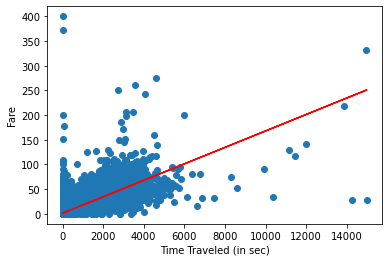

In [30]:
x=data.Travel_duration
y=data.fare_amount
m,b=np.polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,m*x+b,'red')
plt.xlabel("Time Traveled (in sec)")
plt.ylabel("Fare")

Text(0, 0.5, 'Fare')

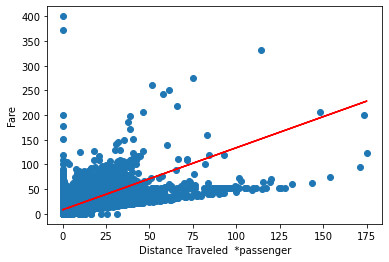

In [31]:
x=data.pass_dist
y=data.fare_amount
m,b=np.polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,m*x+b,'red')
plt.xlabel("Distance Traveled  *passenger")
plt.ylabel("Fare")

Text(0, 0.5, 'Fare')

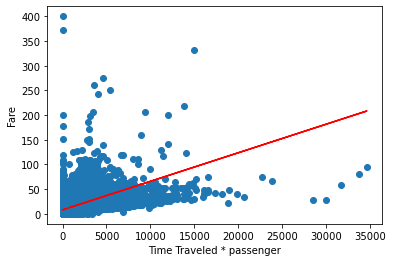

In [32]:
x=data.pass_time
y=data.fare_amount
m,b=np.polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,m*x+b,'red')
plt.xlabel("Time Traveled * passenger")
plt.ylabel("Fare")

<AxesSubplot:>

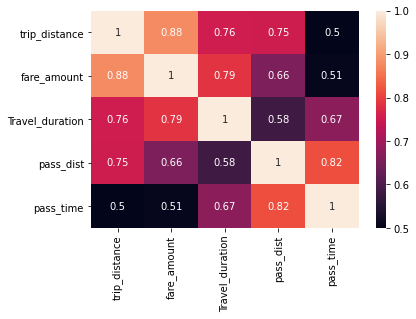

In [33]:
sns.heatmap(data.corr(),annot=True)

In [34]:
feature_col=['trip_distance', 'Travel_duration','pass_dist', 'pass_time']
X=data[feature_col]
y=data['fare_amount']
lm=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test  = std_scale.transform(X_test)
lm.fit(X_train,y_train)

LinearRegression()

In [35]:
y_predict=lm.predict(X_train)
mea=mean_absolute_error(y_predict,y_train)
print("Train Error : "+str(mea))

Train Error : 2.008646485953968


In [36]:
y_predict=lm.predict(X_test)
mea=mean_absolute_error(y_predict,y_test)
print("Test Error : "+str(mea))

Test Error : 1.9025751940063576


In [37]:
lm.coef_

array([ 8.18085123,  4.51639336,  0.87446158, -1.08435214])

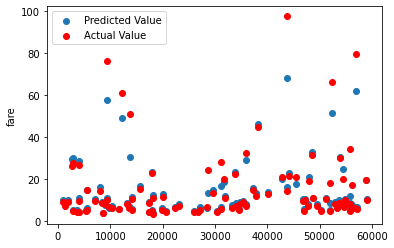

In [38]:
n=random.randint(0,len(y_test)-200)
plt.scatter(y_test.index[n:n+100],y_predict[n:n+100])
plt.scatter(y_test.index[n:n+100],y_test[n:n+100],color='red')
plt.ylabel("fare")
plt.legend(["Predicted Value","Actual Value"])


Text(0, 0.5, 'Error')

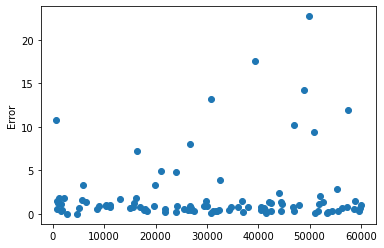

In [39]:
n=random.randint(0,len(y_test)-200)
plt.scatter(y_test.index[n:n+100],abs(y_test-y_predict)[n:n+100])
plt.ylabel("Error")

Text(0, 0.5, 'Error in predicted values')

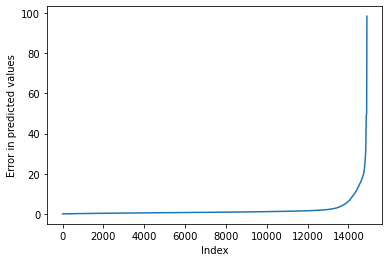

In [40]:
error=abs(y_test-y_predict)
error.sort_values(inplace=True)
plt.plot(range(1,len(error)+1),error)
plt.xlabel("Index")
plt.ylabel("Error in predicted values")

In [41]:
#change this for whole test data set
test_data=pd.read_csv("test_data_iitm.csv")

In [42]:
travel_duration=[duration(test_data.tpep_pickup_datetime[i],test_data.tpep_dropoff_datetime[i]) for i in test_data.index]
td=pd.DataFrame(travel_duration)
td.columns=['Travel_duration']
test_data1=pd.concat([test_data,td],axis=1)
test_data1['passenger_count'].replace(np.nan,1,inplace=True)
test_data1=test_data1[['passenger_count', 'trip_distance','Travel_duration']]
x=test_data1.passenger_count*test_data1.trip_distance
xd=pd.DataFrame(x)
xd.columns=['pass_dist']
test_data1=pd.concat([test_data1,xd],axis=1)
x=test_data1.passenger_count*test_data1.Travel_duration
xd=pd.DataFrame(x)
xd.columns=['pass_time']
test_data1=pd.concat([test_data1,xd],axis=1)
test_data1.drop(['passenger_count'],axis=1,inplace=True)
X_test  = std_scale.transform(test_data1)
y_predict=lm.predict(X_test)
y_p=pd.DataFrame(y_predict)
y_p.columns=['fare_amount']
y_p.index=test_data.index
df=pd.concat([test_data,y_p],axis=1)
df.to_csv("ME18B166_S_NAVEEN_predictions.csv")